In [1]:
from concave_billiards import *

In [2]:
def mushroom(t):
    if t < 0.5:
        return circle(t)
    if t <= .6:
        t -= .5
        return np.array([-1+ 5*t, 0])
    if t <= .7:
        t -= .6
        return np.array([-.5, -10*t])
    if t <= .8:
        t -= .7
        return np.array([-.5 + 10*t, -1])
    if t <= .9:
        t -= .8
        return np.array([.5, -1 + 10*t])
    else:
        t-=.9
        return np.array([.5 + 5*t, 0])

In [3]:
x = np.array([-.75,0])
v = np.array([1,1])
p = np.array([0,0])


N = 90
#stores result where X[i,j] is the ith bounce's jth result in (x, v, p-section)
X = np.zeros([N,3,2])
X[0] = x,v,p

#bounce N times and plot trajectories
for i in range(N-1):
    X[i+1] = bounce(X[i,0], X[i,1], mushroom, tol = 1e-16, poincare = True, concavity = 20)

/Users/nathan/Misc Projects/Billiards/concave_billiards.py:69: RuntimeWarning: divide by zero encountered in double_scalars
  if m[0]/m[1] < 0:


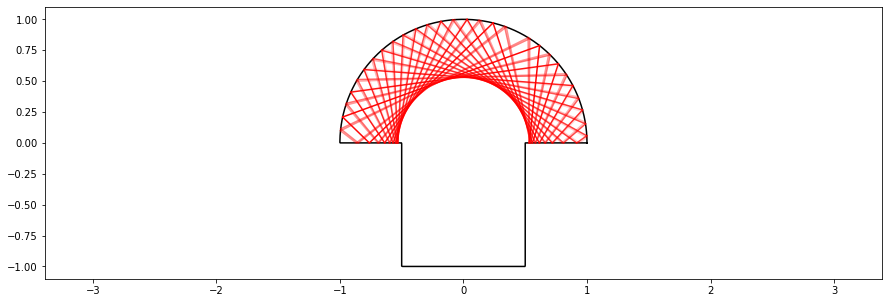

In [4]:
fig = plt.figure(figsize = (15,5))

#plot circlular border
t = np.linspace(0, 1, 1000)
border = np.zeros([t.shape[0], 2])
for i in range(border.shape[0]):
    border[i] = mushroom(t[i])
    
plt.plot(border[:,0], border[:,1], color = 'black')
plt.axis('equal')

for i in range(len(X)-1):
    plt.plot([X[i,0][0], X[i+1,0][0]], [X[i,0][1], X[i+1,0][1]], color = 'red', alpha = (i+1)/len(X))
plt.savefig("./images/mushroom_equilibrium.png")

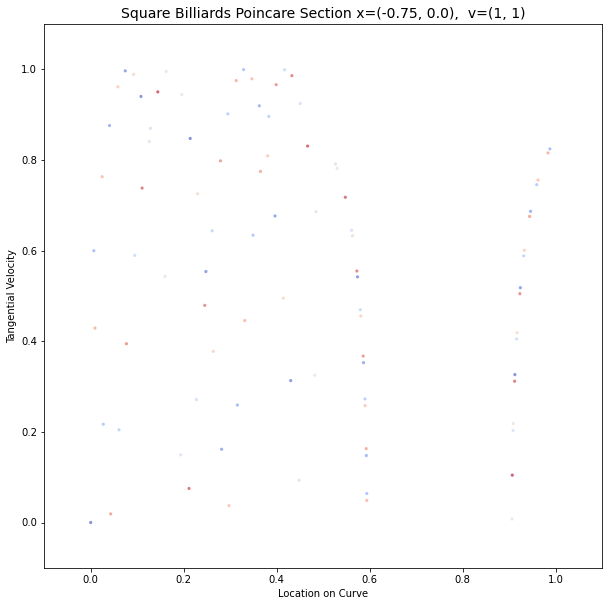

In [5]:
fig = plt.figure(figsize = (10,10))
imgname = 'placeholder'

delt = .1
cmap = np.arange(X.shape[0])
plt.scatter(X[:,2,0], X[:,2,1], cmap = 'coolwarm', c = cmap, alpha = .5, s = 5)
plt.xlim(0-delt,1+delt)
plt.ylim(0-delt,1+delt)
plt.xlabel('Location on Curve')
plt.ylabel("Tangential Velocity")
plt.title(f"Square Billiards Poincare Section x=({x[0]}, {x[1]}),  v=({v[0]}, {v[1]})", fontsize = 14)
plt.savefig(f'./images/{imgname}.png')

In [6]:
# # MINIMIZATION DIAGNOSTICS
# N = 100

# t = np.linspace(0,1,N)
# s = np.linspace(0,1,N)

# tt,ss = np.meshgrid(t,s)
# space = np.zeros([N,N])
# for i in range(N):
#     for j in range(N):    
#         space[i,j] = collide(np.array([tt[i,j],ss[i,j]]), x, v, mushroom)
        
# plt.imshow(space)
# plt.colorbar()